타이타닉 생존율 분석해보기 
상관분석, 상관계수 , 피어슨 상관계수 , 히트맵 
타이나닉 데이터 seaborn 내장 데이터셋 
전처리 비슷하게 null 값을 최빈값(가장 빈도가 높은 데이터),중앙값 대체 
1)모든변수간 상관 계수구하고
2)지정한 두변수간 상관계수도 구하기

용어정리 
상관분석 : 두변수가 어떤 선형적 관계에 있는지 분석하는 방법, 
두변수의 관계의 강도를 상관관계라고 함 
상관관계의 정도를 나타내는 단위를 모상관 계수 p(파이)를 사용함 

단순 상관분석 : 두변수 사이의 어느정도 강한 관계인지 
다중상관 분석 : 세개이상의 변수간 관계의 강도를 측정

상관계수 : +,-,독립변수가 , 종속변수에 어떠한 영향을 미치는지,
x증가시y도 증가하는지 아니면 감소하는지
이번에는 수치를 구간을 나눠서 어느정도 연관성이 있는지 수치화해서 예측하기

피어슨 상관계수 
ex) 0.0 ~ 0.2 : 상관관계가 거의 없다.
ex) 0.2 ~ 0.4 : 약한 상관관계가 있다.
ex) 0.4 ~ 0.6 : 상관관계가 있다.
ex) 0.6 ~ 0.8 : 강한 상관관계가 있다.
ex) 0.8 ~ 1.0 : 매우 강한 상관관계가 있다.

In [2]:
#데이터 수집
import seaborn as sns
import pandas as pd

#타이타닉 데이터 세트는 Seaborn에 내장된 데이터 세트
titanic = sns.load_dataset("titanic")
# index=False ,데이터프레임(DF로 표현 중) 행의 레이블을 csv에 쓰지 않음. 
titanic.to_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/titanic_231219_2.csv", index=False)

In [3]:
# 데이터 준비
# 중간중간 비어있는 값이 있음(결측치, 누락된값 ) . 비어있는컬럼 : age , embarked , deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체값으로 채울예정 
# age -> 중앙값으로 값을 대체 , embarked , deck , embark_town : 최빈값()으로 대체하자 
# 임의로 정했음 
# 임의로 정한룰 데이터가 부족하거나..표본집단을 정하는 경우도 많음 
# 최빈값 : 예 ) 카테고리 suv(70개) , 승용차(30개) 전기차(30개) -> 승용차 최빈값 


# titanic : 메모리상에 있는 데이터를 기본조사, 널 조사 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# age, embarked, deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체 값으로 채울 예정. 
# age -> 중앙값으로 값을 대체, 
# titanic['age'].median() : 중앙값
# fillna 함수 이용해서, null 값에 , 해당 인자값 , 중앙값으로 채우기. 
# 다신, age 컬럼에 비어있는 값에, 중앙값으로 채우기. 
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# 결과 확인. 
titanic.isnull().sum()
# embarked, deck , embark_town : 최빈값()으로 대체 하자.
# embarked 컬럼의 최빈값 조사 -> S    644 , 사용
titanic["embarked"].value_counts()
# deck -> C    59 ,당첨 
titanic["deck"].value_counts()

# embark_town -> Southampton    644, 당첨
titanic["embark_town"].value_counts()

# 최빈값()으로 대체 
# 조사 후 , 해당 값으로 , 컬럼의 빈값에, 대체 하기. 
titanic["embarked"] = titanic["embarked"].fillna("S")
titanic["deck"] = titanic["deck"].fillna("C")
titanic["embark_town"] = titanic["embark_town"].fillna("Southampton")

# 다시, 결측값 조사. 
# 결과 확인. 
titanic.isnull().sum()



survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
# 데이터 탐색
# info 함수 이용해서 .. 기본정보확인 
titanic.info()
# survived 종속변수로 사용될것임 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [141]:
# 종속변수 survived 생존자 수를 확인 
# 답이있음 ==지도학습 
# 사망자 : 549명 생존자 : 342명 
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

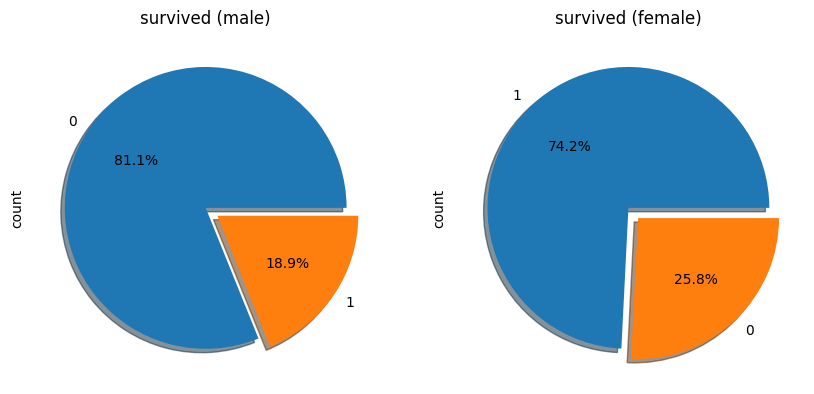

In [15]:
# 기본적인 차트 그리기, 시각화 하기. 
import matplotlib.pyplot as plt 
# 1행에 2개사이즈 이미지 넣고 figsize 비율은 10:5
f, ax = plt.subplots(1,2, figsize= (10,5))

# 시각화 속성 옵션 설정하기. 
# 행에 종속변수 survived 열에는 성별 sex 

# 시각화 속성 옵션 설정하기.  백분율 표기 
titanic['survived'][titanic["sex"] =='male'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
titanic['survived'][titanic["sex"] =='female'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[1], shadow = True)


# 제목 
ax[0].set_title("survived (male)")
ax[1].set_title("survived (female)")

plt.show()



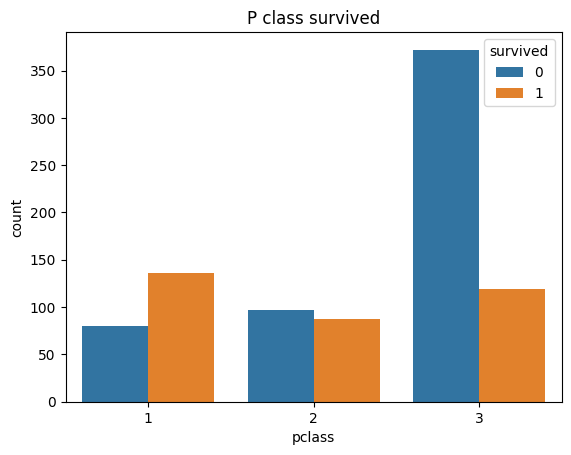

In [16]:
#객실 등급별 생존자수 차트 드리기 
# hue="survived" : 종속변수 
sns.countplot(x="pclass",hue="survived",data=titanic)
plt.title("P class survived")
plt.show()


용어정리 
상관분석 : 두변수가 어떤 선형적 관계에 있는지 분석하는 방법, 
두변수의 관계의 강도를 상관관계라고 함 
상관관계의 정도를 나타내는 단위를 모상관 계수 p(파이)를 사용함 

단순 상관분석 : 두변수 사이의 어느정도 강한 관계인지 
다중상관 분석 : 세개이상의 변수간 관계의 강도를 측정

상관계수 : +,-,독립변수가 , 종속변수에 어떠한 영향을 미치는지,
x증가시y도 증가하는지 아니면 감소하는지
이번에는 수치를 구간을 나눠서 어느정도 연관성이 있는지 수치화해서 예측하기

피어슨 상관계수 
ex) 0.0 ~ 0.2 : 상관관계가 거의 없다.
ex) 0.2 ~ 0.4 : 약한 상관관계가 있다.
ex) 0.4 ~ 0.6 : 상관관계가 있다.
ex) 0.6 ~ 0.8 : 강한 상관관계가 있다.
ex) 0.8 ~ 1.0 : 매우 강한 상관관계가 있다.

corr() 함수는 Pandas에서 제공하는 데이터프레임의 열 간 상관 계수를 계산하는 함수입니다. 상관 계수는 두 변수 간의 선형 관계의 강도와 방향을 측정하는 통계적 지표로, -1에서 1 사이의 값을 가지며 다음과 같은 특징을 가집니다:

1에 가까우면 양의 선형 관계가 강함을 나타냅니다.
-1에 가까우면 음의 선형 관계가 강함을 나타냅니다.
0에 가까우면 선형 관계가 약하거나 없다는 것을 나타냅니다.

In [17]:
# 데이터 모델링 
# 상관 분석은 , pandas 에서 제공하는 corr() 함수 이용하고, : 상관관계 구해주는 함수 
# 상관 계수 : 피어슨 상관계수를 이용.
# titanic.info()
# 문제점, 해당 데이터 프레임에 숫자가 아닌 문자열이 포함이 되어서, 변환을 못한다는 에러 
# 확인 시에는 알아서, 해당 숫자 컬럼만 선택을 했었는데, 다시, 기존 코드부분 확인하니. 
# 되었던 코드도 안되는 상황이라서, 
# chat gpt에게, corr 함수 속성에서, 숫자 부분만 선택하는 부분을 질문에 답을 받아서, 수정. 

# titanic_corr = titanic.corr(method = 'pearson')
# 해결책 -> 해당 데이터 프레임에서, 숫자 부분 컬럼만 가져오기. 
import numpy as np
numeric_titanic = titanic.select_dtypes(include=[np.number])
# 숫자 필드로만 구성된 데이터 프레임 확인. 
# numeric_titanic 
titanic_corr = numeric_titanic.corr(method = 'pearson')
titanic_corr

# csv 파일로 변환 
titanic_corr.to_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/titanic-corr.csv", index=False)




In [19]:
# 특정 변수의 상관관계 분석해보기 
# 성인 남자일수록 - 생존자 감소 음의 상관관계 
titanic["survived"].corr(titanic["adult_male"])
# 특정 변수의 상관관계 분석해보기 . fare 객실요금
titanic["survived"].corr(titanic["fare"])

0.2573065223849622

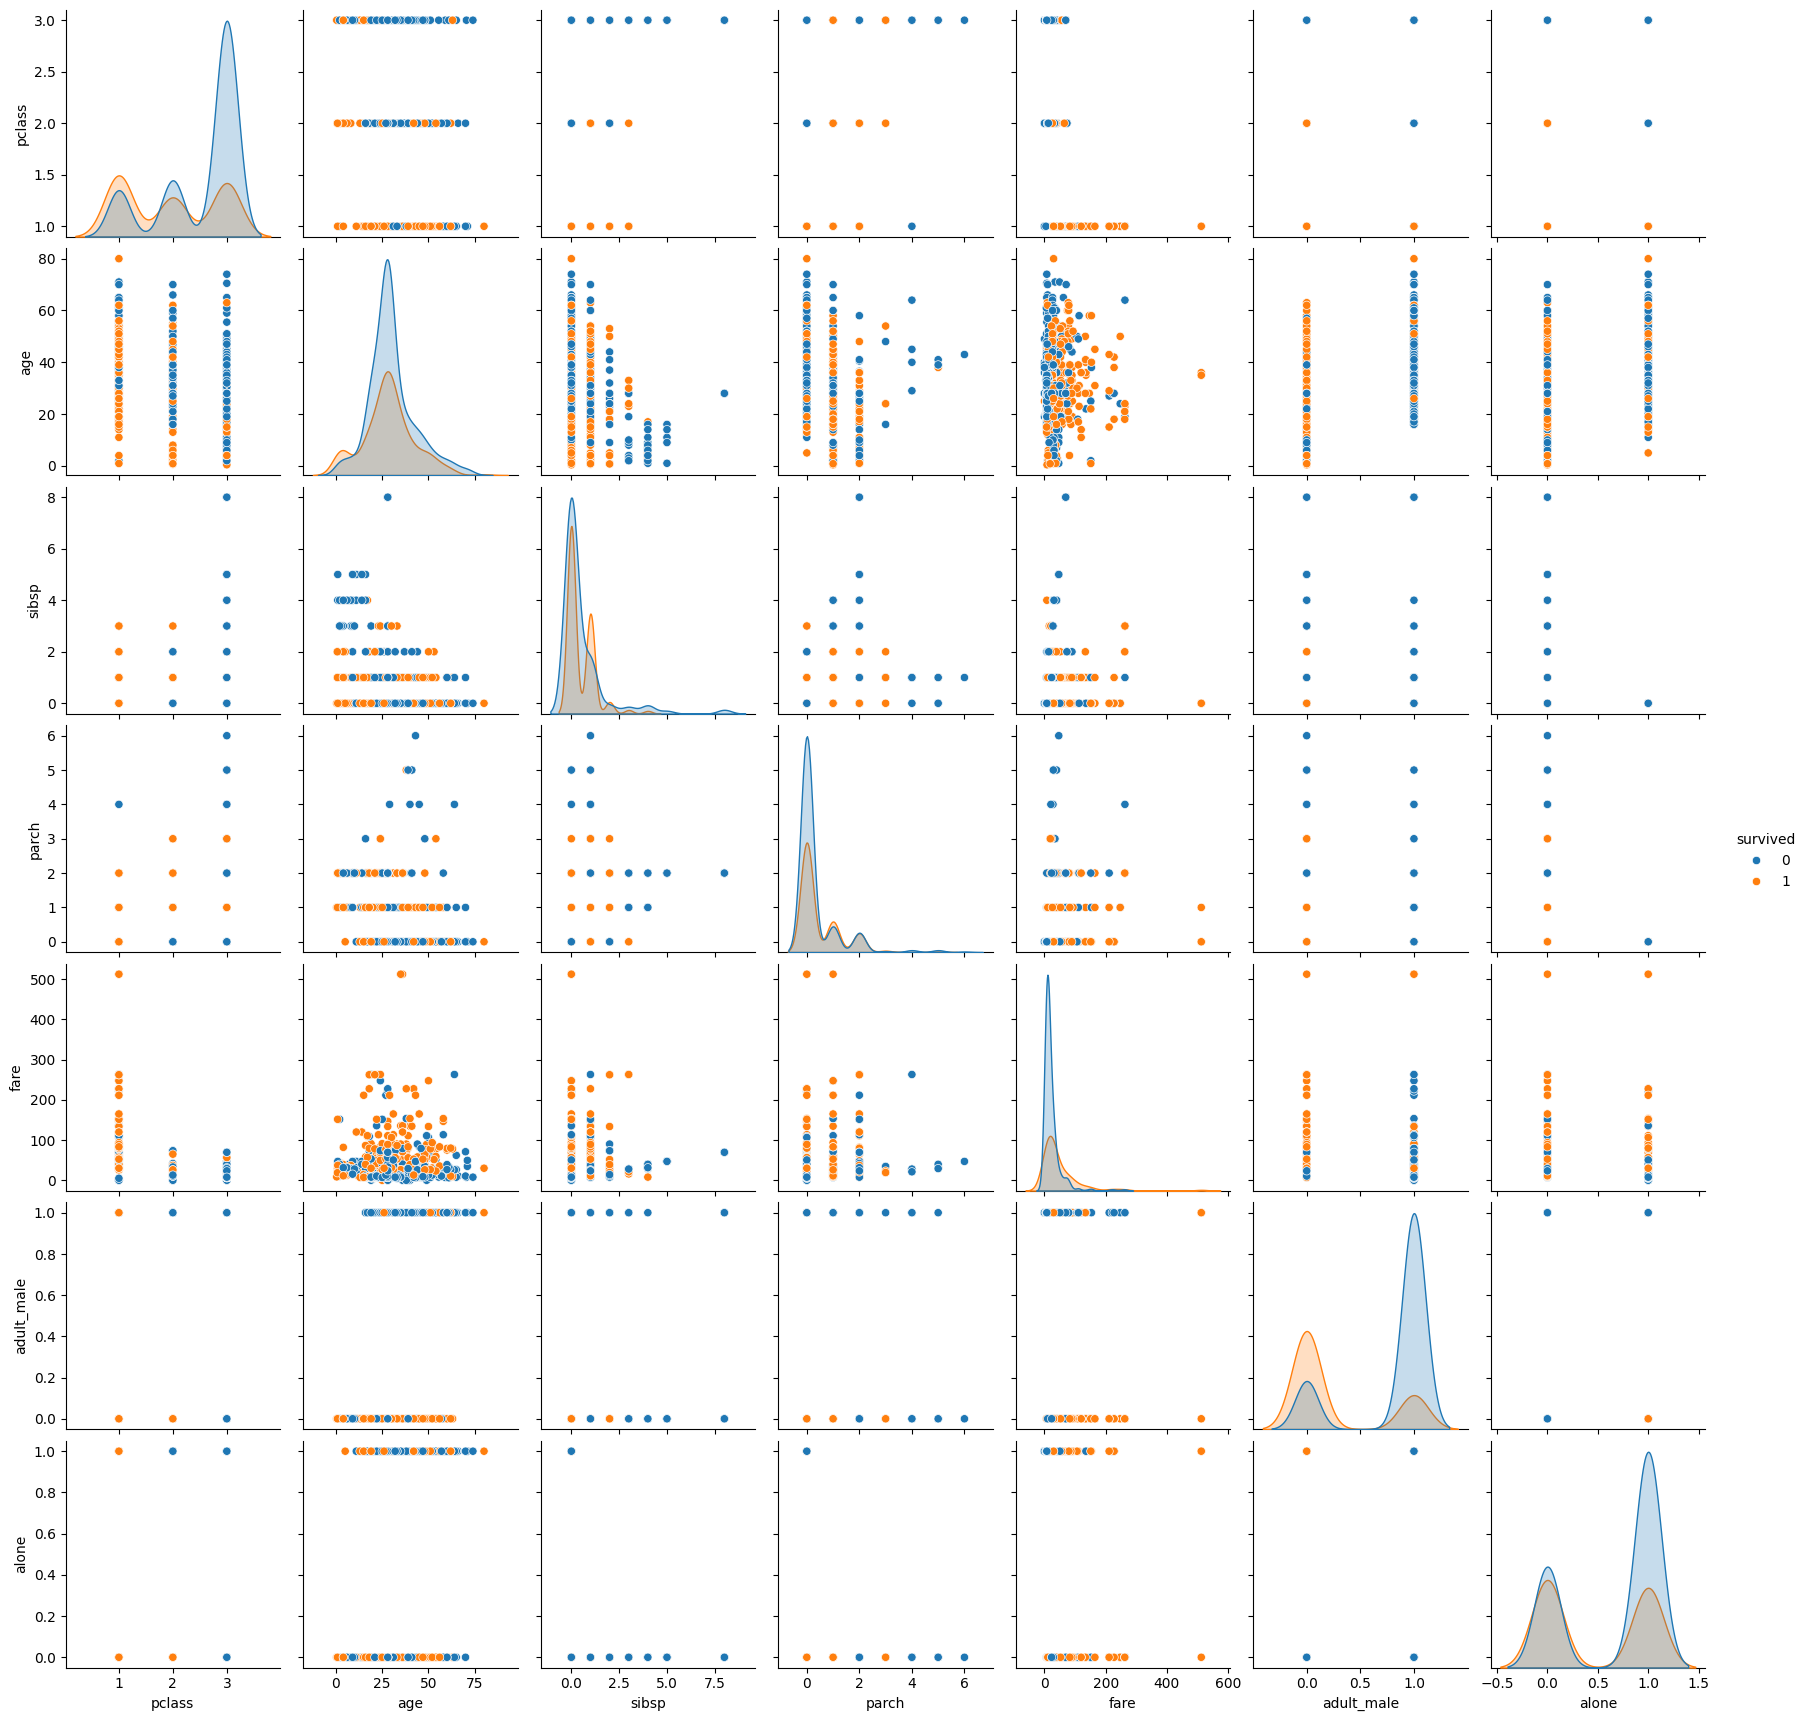

In [20]:
# 시각화 해보기
# seaborn 패키지의 pairplot()이용해서 시각화 
# pairplot -> 그리드(표) 형태로 각 데이터 열의 조합을 산점도(scatter plot)로 그린다
# 같은 데이터가 만나는 대각선 부분은 히스토그램으로 그리기 
sns.pairplot(titanic,hue="survived")
plt.show()



In [21]:
print(titanic['sex'].unique())
print(titanic['sex'].isnull().sum())

['male' 'female']
0


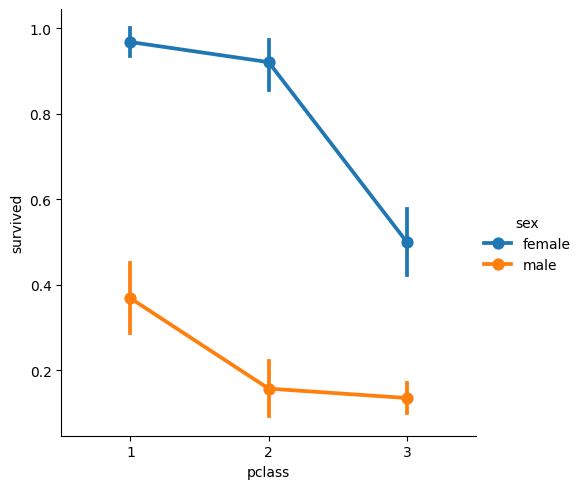

In [23]:
#두개의 변수의 상관관계 차트 그리기 
sns.catplot(x="pclass",y="survived",hue="sex",data=titanic,kind="point")
plt.show()
# 종속변수를(생존여부) 성비에 따라서  , 

In [24]:
# 히트맵으로 시각화하기 
# 각 변수들에 대해서 , 상관관계 개수를 , 해당영역에 온도로 표시를함
# 관련이 높을 수록 , 뜨거운 온도를 빗대어서 , 빨간색으로 표시 , 음의 상관관계이면 파란색 

#변수중에 age : 나이 구간별로, 카테고리 작업해서 , 시각화를 용이하게 할려고 
#10살미만 : 카테고리 0 
#10살이상 ~ 20살미만 : 카테고리 1 
#20살이상 ~ 30살미만 : 카테고리 2 
#30살이상 ~ 40살미만 : 카테고리 3 
#40살이상 ~ 50살미만 : 카테고리 4 
#50살이상 ~ 60살미만 : 카테고리 5 
#60살이상 ~ 70살미만 : 카테고리 6 
#70살이상 ~ 80살미만 : 카테고리 7

def catogoryAge(x):
  if x < 10:
    return 0
  elif x <20:
    return 1
  elif x <30:
    return 2
  elif x <40:
    return 3
  elif x <50:
    return 4
  elif x <60:
    return 5
  elif x <70:
    return 6
  else:
    return 7

# 새로운 카테고리 컬럼 categoryAge => age2
titanic['age2'] = titanic["age"].apply(catogoryAge)

# 성비도 문자열에서, 남자 : 1, 여자 : 0 
titanic["sex"] = titanic["sex"].map({"male": 1, "female": 0})


# 가족의 수를 따로 컬럼을 추가하기. family
# sibsp : 형제 자매, 배우자 , parch: 부모, 어린이 
titanic["family"] = titanic["sibsp"] + titanic["parch"] + 1

# 새로운 데이터를 csv 파일로 변환
titanic.to_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/titanic-231219_new_family.csv", index=False)
    

<Axes: >

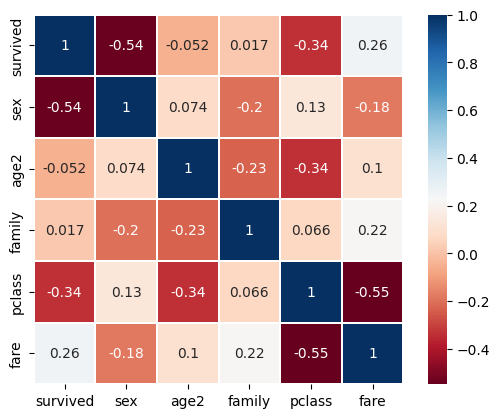

In [25]:
# 데이터를 새로 변경 후, 히트맵 그리기 
heatmap_data = titanic[["survived", "sex", "age2", "family", "pclass","fare"]]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax= 1.0 , square=True, cmap = colormap, linecolor="white", annot = True, annot_kws={"size": 10})


In [157]:
import pandas as pd
# 경로이름지정해서 파일 처리할때 사용하는 도구 
import glob
# 정규 표현식에 사용하는도구 
import re
# 2차원 리스트를 -> 1차원 리스트로 차원축소시 사용하는도구 
from functools import reduce
# 자연어 처리 패키지 중에서 , 단어 토큰화 작업 
from nltk.tokenize import word_tokenize
# 불용어 처리 작업 
from nltk.corpus import stopwords
# 표제어 추출 
from nltk.stem import WordNetLemmatizer
# 단어의 빈도를 추출하는도구 
from collections import Counter 
import matplotlib.pyplot as plt
# 단어의 빈도수를 시각화하는 도구 , 빈도가 높을수록 글자크기가커짐  
from wordcloud import STOPWORDS ,WORDCLOUD 

 




In [164]:
import glob
# pip3 install xlrd 
# 데이터 조합(병합)하기
# 현재 폴더 내부에 있는 받았던 엑셀 파일명 10개를 선택하기 
all_files = glob.glob("./myCabinetExcelData*.xls")
all_files


# 엑셀 파일 읽어서 -> 데이터 프레임 (표형태) 변환 -> 특정리스트에 담아두기
# 임시로 저장할 리스트변수
# all_files_data =[엑셀1,엑셀2,엑셀3,~ ]
all_files_data =[]

#all_files 에 담겨진 엑셀 파일의 위치가 들어있고, 
# 해당 위치의 엑셀파일을 읽어서 데이터 프레임 표형태로 변환하기 
# 임시리스트에 담기 

for file in all_files:
    #  해당 엑셀 파일의 위치의 물리파일읽기 
    data_frame = pd.read_excel(file)
    # 임시리스트에 담기 
    all_files_data.append(data_frame)
    #샘플 확인해보기= 첫번째 요소  
all_files_data[0]





,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big-Data Challenge Advances highlight big issues,unknown,BEIJING REVIEW,2014
1,NaN,2,Big-Data-Driven Stem Cell Science and Tissue E...,"Del Sol, Antonio; Thiesen, Hans J.; Imitola, J...",ELSEVIER SCIENCE B.V; AMSTERDAM,2017
2,NaN,3,Big-data driven functional interaction pattern...,"Zheng, Minrui",SCIENCE PRESS,2022
3,NaN,4,Big-Data and Simulations of Social and Economi...,"Takayasu, H.",JAPAN TECHNICAL INFORMATION SERVICE,2014
4,NaN,5,Big-Data Science: Infrastructure Impact,"Monga, Inder; Prabhat,",INDIAN NATIONAL SCIENCE ACADEMY,2018
...,...,...,...,...,...,...
95,NaN,96,Careers: Graduate programs for big-data analysts,unknown,IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2013
96,NaN,97,PMU121 APPLICATION OF REAL-WORLD DATA FROM MED...,"Wang, Y.; Xing, Y.; Wu, Y.; Yuan, N.; Wang, F....","Elsevier Science B.V., Amsterdam",2020
97,NaN,98,Design and Implementation of Big-Data Analysis...,"Zhang, Pan; Ding, Lingyun; Jiang, Ning; Ling, ...","Elsevier Science B.V., Amsterdam",2018
98,NaN,99,Performance Meta-analysis for Big-Data Univari...,"Stefanopoulou, Aliki",Springer,2022


In [167]:

# 엑셀파일10개를 병합해서 출력해보기 
all_files_data_concat= pd.concat(all_files_data,acis=0,ignore_index=True)
all_files_data_concat.shape
# 병합된 파일을 csb 파일로 변환하기 

TypeError: concat() got an unexpected keyword argument 'acis'